In [1]:
#Blood cell subtype classification
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
from numpy.random import seed
seed(15)
from tensorflow import set_random_seed
set_random_seed(15)
import random
random.seed(15) 

/home/o/tmp/ana/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/o/tmp/ana/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/o/tmp/ana/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/o/tmp/ana/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: P

In [3]:
#TRAIN AND TEST DATASET ADDRESS
DATASET="blood-cells/dataset2-master/dataset2-master/images/TRAIN"
TEST_DATASET="blood-cells/dataset2-master/dataset2-master/images/TEST"

#4 types of subcells
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

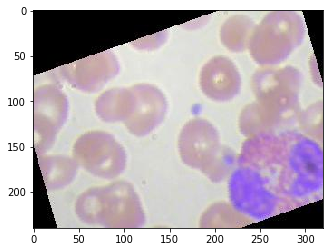

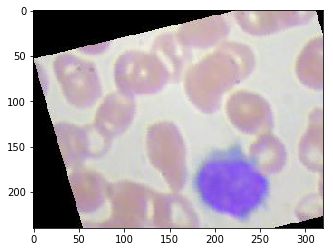

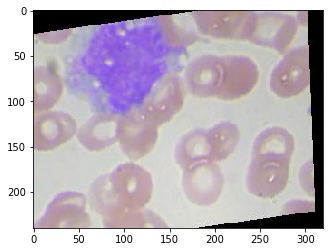

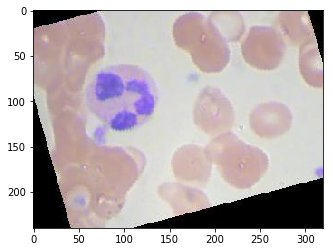

In [4]:
#reading original image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

(240, 320, 3)


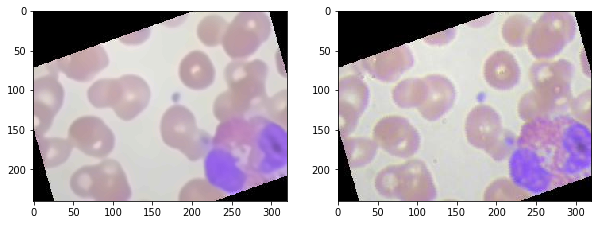

(240, 320, 3)


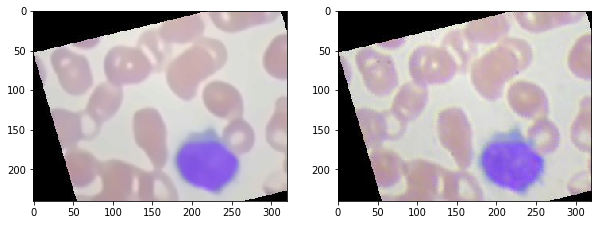

(240, 320, 3)


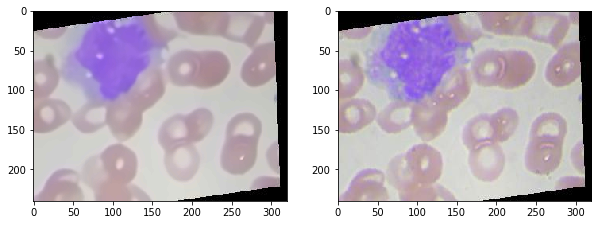

(240, 320, 3)


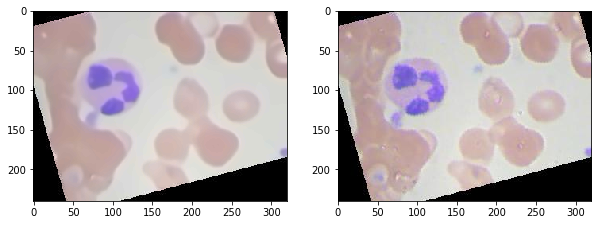

In [5]:
#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
      
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            #image convert to smaller pixels 60*60
            print(img.shape)
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            plt.imshow(dst)
            plt.subplot(122)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

In [6]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [7]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [8]:
#print total data in train and test
print(len(train_data))
print(len(test_data))

9957
2487


In [9]:
#shuffle the dataset fo good result
random.Random(15).shuffle(train_data)
random.Random(15).shuffle(test_data)

In [10]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])

3
2
3
2
1
2
0
0
1
3


In [11]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(9957, 9957)

In [12]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(2487, 2487)

In [13]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,64,64,3)
train_X=train_X/255.0
train_X.shape

#we divide the np array by 255 to close all values to 0

(9957, 64, 64, 3)

In [14]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B

test_X=np.array(test_X).reshape(-1,64,64,3)
test_X=test_X/255.0
test_X.shape

#we divide the np array by 255 to close all values to 0

(2487, 64, 64, 3)

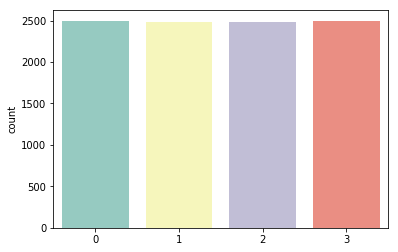

In [15]:
#count labels

sns.countplot(train_y,palette='Set3')
#we can see each categroy has equal data 

In [16]:
#convert label into the one hot encode
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

Using TensorFlow backend.


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [17]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [18]:
#build the models
#import Keras libraries

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

In [20]:
model=Sequential()

model.add(Conv2D(64,(1,1),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.20))          
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.20))
          
model.add(Dense(4,activation='softmax'))

model.summary()

W0218 06:14:02.162612 140707683071744 deprecation.py:506] From /home/o/tmp/ana/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       7

In [21]:
#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy
#opt=optimizers.adam()

In [22]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
#lets split the 20% train dataset for validation ------10+10+5
hist=model.fit(train_X,one_hot_train,epochs=40,batch_size=64,validation_split=0.3,workers=3)

Train on 6969 samples, validate on 2988 samples
Epoch 1/40
6969/6969 [==============================] - 43s 6ms/sample - loss: 1.3898 - acc: 0.2472 - val_loss: 1.3863 - val_acc: 0.2547
Epoch 2/40
6969/6969 [==============================] - 44s 6ms/sample - loss: 1.3867 - acc: 0.2482 - val_loss: 1.3865 - val_acc: 0.2396
Epoch 3/40
6969/6969 [==============================] - 44s 6ms/sample - loss: 1.3865 - acc: 0.2563 - val_loss: 1.3862 - val_acc: 0.2547
Epoch 4/40
6969/6969 [==============================] - 42s 6ms/sample - loss: 1.3521 - acc: 0.3197 - val_loss: 1.2575 - val_acc: 0.3942
Epoch 5/40
6969/6969 [==============================] - 41s 6ms/sample - loss: 1.1934 - acc: 0.4222 - val_loss: 1.1117 - val_acc: 0.4364
Epoch 6/40
6969/6969 [==============================] - 41s 6ms/sample - loss: 1.1052 - acc: 0.4388 - val_loss: 1.0705 - val_acc: 0.4702
Epoch 7/40
6969/6969 [==============================] - 40s 6ms/sample - loss: 1.0787 - acc: 0.4564 - val_loss: 1.0543 - val_acc: 

In [35]:
#lets split the 20% train dataset for validation -----
hist1=model.fit(train_X,one_hot_train,epochs=10,batch_size=64,validation_split=0.3,workers=3)

Train on 6969 samples, validate on 2988 samples
Epoch 1/10
6969/6969 [==============================] - 40s 6ms/sample - loss: 0.3862 - acc: 0.8404 - val_loss: 0.3340 - val_acc: 0.8614
Epoch 2/10
6969/6969 [==============================] - 41s 6ms/sample - loss: 0.3650 - acc: 0.8482 - val_loss: 0.3273 - val_acc: 0.8598
Epoch 3/10
6969/6969 [==============================] - 41s 6ms/sample - loss: 0.3561 - acc: 0.8523 - val_loss: 0.3228 - val_acc: 0.8641
Epoch 4/10
6969/6969 [==============================] - 41s 6ms/sample - loss: 0.3488 - acc: 0.8541 - val_loss: 0.3312 - val_acc: 0.8558
Epoch 5/10
6969/6969 [==============================] - 41s 6ms/sample - loss: 0.3472 - acc: 0.8565 - val_loss: 0.2956 - val_acc: 0.8788
Epoch 6/10
6969/6969 [==============================] - 41s 6ms/sample - loss: 0.3566 - acc: 0.8522 - val_loss: 0.4619 - val_acc: 0.8062
Epoch 7/10
6969/6969 [==============================] - 41s 6ms/sample - loss: 0.3548 - acc: 0.8515 - val_loss: 0.3059 - val_acc: 

In [39]:
hist2=model.fit(train_X,one_hot_train,epochs=10,batch_size=64,validation_split=0.1,workers=3)

Train on 8961 samples, validate on 996 samples
Epoch 1/10
8961/8961 [==============================] - 47s 5ms/sample - loss: 0.2851 - acc: 0.8827 - val_loss: 0.2777 - val_acc: 0.8785
Epoch 2/10
8961/8961 [==============================] - 49s 5ms/sample - loss: 0.2944 - acc: 0.8805 - val_loss: 0.2496 - val_acc: 0.8926
Epoch 3/10
8961/8961 [==============================] - 50s 6ms/sample - loss: 0.2900 - acc: 0.8866 - val_loss: 0.2563 - val_acc: 0.8865
Epoch 4/10
8961/8961 [==============================] - 49s 5ms/sample - loss: 0.2802 - acc: 0.8892 - val_loss: 0.2748 - val_acc: 0.8876
Epoch 5/10
8961/8961 [==============================] - 50s 6ms/sample - loss: 0.2836 - acc: 0.8900 - val_loss: 0.2886 - val_acc: 0.8745
Epoch 6/10
8961/8961 [==============================] - 51s 6ms/sample - loss: 0.2878 - acc: 0.8876 - val_loss: 0.3042 - val_acc: 0.8725
Epoch 7/10
8961/8961 [==============================] - 49s 5ms/sample - loss: 0.2681 - acc: 0.8915 - val_loss: 0.2344 - val_acc: 0

In [40]:
#model evaluation
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

2487/2487 [==============================] - 3s 1ms/sample - loss: 0.7789 - acc: 0.7604


(0.778944546408475, 0.76035386)

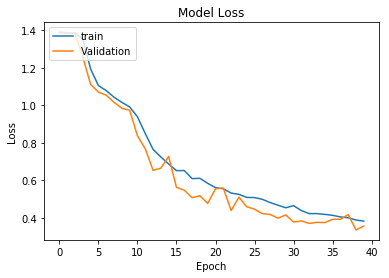

In [41]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

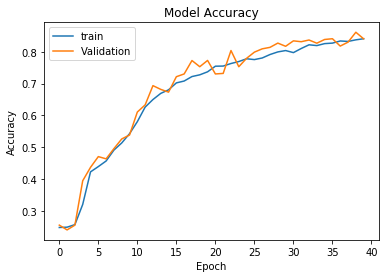

In [42]:
#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [43]:
#model prediction

y_pred=model.predict_classes(test_X)
y_pred

array([1, 1, 3, ..., 3, 1, 1])

In [44]:
for i in range(10):
    print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))

Actual=1, Predicted=1
Actual=1, Predicted=1
Actual=0, Predicted=3
Actual=2, Predicted=2
Actual=2, Predicted=2
Actual=1, Predicted=1
Actual=3, Predicted=3
Actual=1, Predicted=1
Actual=3, Predicted=0
Actual=1, Predicted=1


In [45]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)

0.7603538399678327

In [46]:
confusion_matrix(test_y,y_pred)

array([[444,  16,   1, 162],
       [  8, 610,   0,   2],
       [ 37,   0, 392, 191],
       [159,   2,  18, 445]])

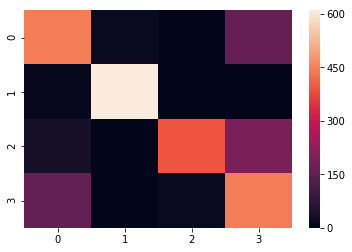

In [47]:
sns.heatmap(confusion_matrix(test_y,y_pred))

In [50]:
model.save('wbc_model.h5')

In [54]:
from tensorflow.keras.models import load_model
new_model = load_model('wbc_model.h5')

W0218 07:27:01.092341 140707683071744 deprecation.py:506] From /home/o/tmp/ana/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0218 07:27:01.098259 140707683071744 deprecation.py:506] From /home/o/tmp/ana/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
new_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       7

In [56]:
new_model.get_weights()

[array([[[[-0.08910293,  0.03327469, -0.01596441, -0.15271714,
            0.21571366, -0.15306835,  0.2235099 , -0.2542004 ,
            0.28198028,  0.11080483,  0.19541308,  0.05871071,
            0.2571415 , -0.2864578 ,  0.23726897,  0.28152332,
            0.00141579, -0.13193458,  0.21459912, -0.10625289,
           -0.2123088 , -0.02021839, -0.08308026, -0.2620943 ,
            0.08533209,  0.27650702,  0.0138943 ,  0.02950313,
            0.04689838, -0.132716  , -0.04219252, -0.24061875,
            0.01983738, -0.1068882 ,  0.12093643,  0.04391855,
           -0.26441896, -0.10984916, -0.0213872 ,  0.14649397,
           -0.2429427 , -0.09915702, -0.20220704, -0.14895838,
            0.08796903,  0.27864322,  0.03344072, -0.23156296,
            0.06245857, -0.29582843, -0.29231483,  0.25285077,
            0.04833665,  0.09173094,  0.11943364,  0.07163575,
           -0.24742197, -0.04372755, -0.20433679, -0.21681479,
           -0.29153073,  0.10164322,  0.27908024,  0.07

In [57]:
new_model.optimizer

In [59]:
new_model.loss 

'categorical_crossentropy'

In [60]:
pred=new_model.predict_classes(test_X)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,pred)

0.7603538399678327

In [63]:
# serialize model to JSON
model_json = model.to_json()

In [66]:
with open("wbc_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("wbcmodel.h5")
print("Saved model to disk")

Saved model to disk


In [68]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('wbc_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [69]:
# load weights into new model
loaded_model.load_weights("wbcmodel.h5")
print("Loaded model from disk")

Loaded model from disk


In [73]:
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(test_X, test_y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [75]:
model.save_weights('my_model_weights.h5')

In [80]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

In [82]:
#model2.load_weights('my_model_weights.h5')